In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.signal import spectrogram


def load_bin(filepath: str):
    """Loads the complex-valued int16 data from a given binary file.

    Parameters:
    filepath (str): Path to the input file, which is handled as interleaved
    16-bit integer little-endian data.

    Returns:
    array_like: Complex-valued vector.

   """
    interleaved_data = np.fromfile(filepath, dtype='<i2')
    output = interleaved_data.astype(np.float64).view(np.complex128)
    return output

# Use the function to load data from a binary file
data1 = load_bin("C:/Users/singh/Downloads/DJI_inspire_2_5G_1of2.bin")

In [2]:
fft_data1 = np.fft.fft(data1[:10000000])
magnitudes1 = np.abs(fft_data1)
fs = 200e6  
iq_data_norm = (magnitudes1-np.mean(magnitudes1))/(np.sqrt(np.var(magnitudes1)))


In [30]:
window_size = 100  
step_size = 1  

slope_magnitude = []
kurtosis_magnitude = []
skewness_magnitude = []

In [ ]:
for i in range(0, len(magnitudes1) - window_size, step_size):
    window = magnitudes1[i : i + window_size]

    time_steps = np.arange(window_size).reshape(-1, 1)
    model = LinearRegression()
    model.fit(time_steps, window)
    slope_magnitude.append(model.coef_[0])

    kurtosis_magnitude.append(stats.kurtosis(window))
    skewness_magnitude.append(stats.skew(window))

In [ ]:
# plt.figure(figsize=(10, 5))
plt.plot(slope_magnitude, label='Slope')

# plt.legend(loc='upper right')
plt.show()
# time_steps = time_steps[:len(slope_magnitude)]
slope_magnitude = slope_magnitude[:len(time_steps)]

plt.plot(time_steps, slope_magnitude)

In [ ]:
plt.plot(kurtosis_magnitude, label='Kurtosis')

In [ ]:
plt.plot(skewness_magnitude, label='Skewness')

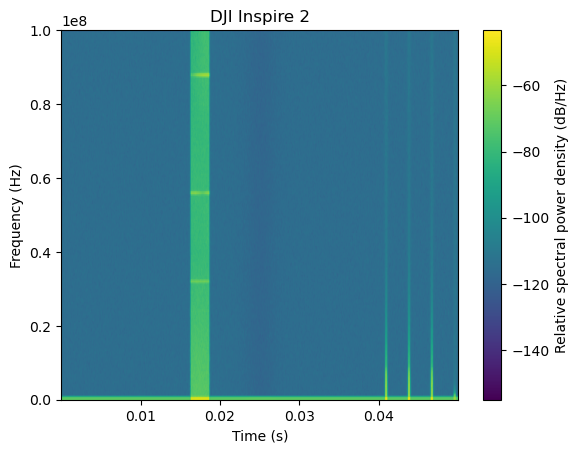

In [5]:
plt.figure()
plt.specgram(iq_data_norm,NFFT=512,Fs=fs,window=np.blackman(512),vmin=-155)
cbar = plt.colorbar()
cbar.set_label('Relative spectral power density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('DJI Inspire 2')
plt.show()

In [9]:
import scipy.signal
fs = 200e6
window_size = int(fs * 0.001)  
window_overlap = int(window_size / 2)  
print(f"Data size: {len(iq_data_norm)}")
print(f"Window size: {window_size}")
print(f"Overlap: {window_size // 2}")

noverlap = window_size // 2
if len(iq_data_norm) < window_size:
    print("The window size is larger than the data size.")
else:
    try:
        frequencies, times, Sxx = scipy.signal.spectrogram(iq_data_norm, fs=fs, window='hann', 
                                              nperseg=window_size, noverlap=noverlap)
    except ValueError as e:
        print(f"An error occurred: {e}")

Data size: 10000000
Window size: 200000
Overlap: 100000


In [28]:
fs = 200e6
# window_size = int(fs * 0.001) 
window_size = 100000
# window_overlap = int(window_size / 2)  
noverlap = window_size // 2
threshold = 0.00000005
frequencies, times, Sxx = scipy.signal.spectrogram(iq_data_norm, fs=fs, window='hann', nperseg=window_size, noverlap=noverlap)

# peaks = scipy.signal.find_peaks(Sxx[50, :], height=threshold)
peak_indices, _ = scipy.signal.find_peaks(Sxx[50, :], height=threshold)
sequence = frequencies[peak_indices]
# sequence = frequencies[peaks]
print (sequence)

[128000. 132000. 140000. 146000. 326000. 350000. 372000. 394000.]


0.0024279425143483896


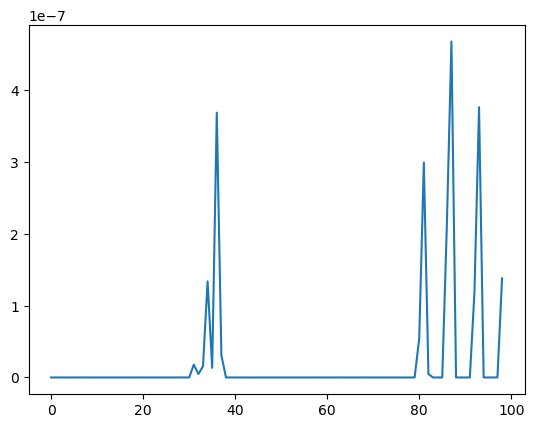

In [22]:
print(np.max(Sxx))  # print max value
plt.plot(Sxx[50, :])  # plot a section of Sxx
plt.show()

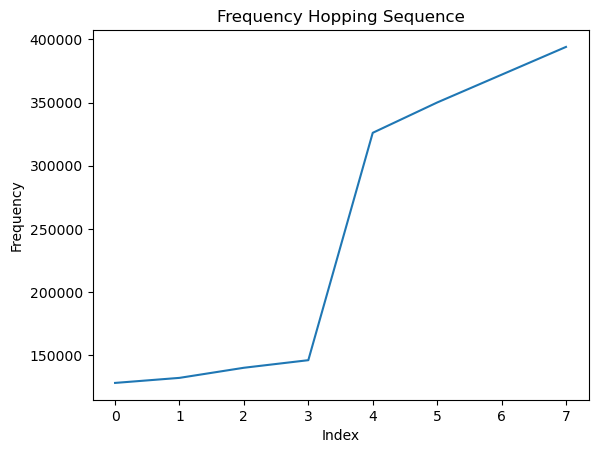

In [29]:
plt.plot(sequence)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Frequency Hopping Sequence')
plt.show()

In [20]:
print(np.isnan(sequence).any())  # This should be False
print(np.isinf(sequence).any())  # This should be False

False
False
